----FIT RESULTS----
T1 = 15.04 μs
Mean Squared Error = 6.0519
R² Score = 0.9779


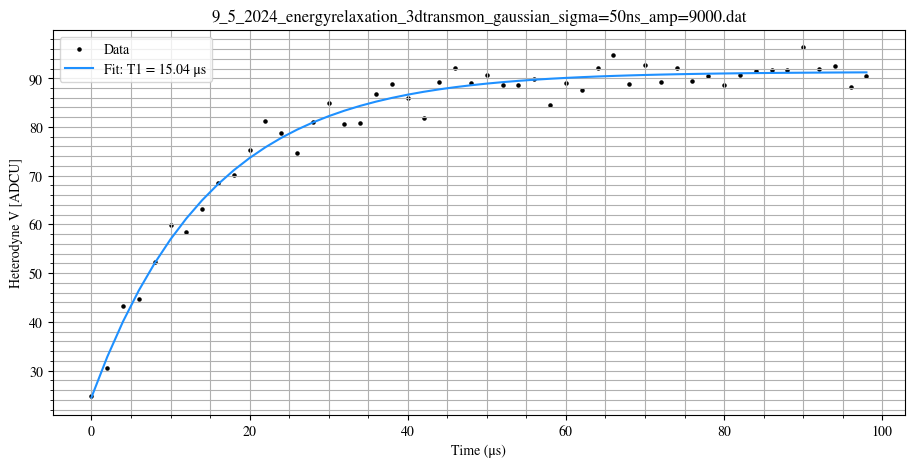

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.formatter.useoffset'] = False

def T1Fit(Data, Output=True):
    Time = Data[:, 0]
    HeterodyneSignal = Data[:, 1]

    # Adjusted initial guesses
    a_guess = np.max(HeterodyneSignal) - np.min(HeterodyneSignal)
    T1_guess = (Time[-1] - Time[0]) / 3
    c_guess = np.min(HeterodyneSignal)

    # Curve fitting
    popt, pcov = curve_fit(lambda t, a, T1, c: a * np.exp(-t / T1) + c, 
                           Time, HeterodyneSignal, p0=(a_guess, T1_guess, c_guess))
    a, T1, c = popt

    # Calculate the fitted signal
    HeterodyneSignalFitted = a * np.exp(-Time / T1) + c

    # Calculate metrics
    mse = mean_squared_error(HeterodyneSignal, HeterodyneSignalFitted)
    r2 = r2_score(HeterodyneSignal, HeterodyneSignalFitted)

    if Output:
        # Print the fit results and metrics
        print('----FIT RESULTS----')
        print(f'T1 = {T1:.2f} μs')
        print(f'Mean Squared Error = {mse:.4f}')
        print(f'R² Score = {r2:.4f}')

        # Plot the data and the fit
        plt.figure(figsize=[11, 5])
        plt.scatter(Time, HeterodyneSignal, s=5, label='Data', color='black')
        plt.plot(Time, HeterodyneSignalFitted, label=f'Fit: T1 = {T1:.2f} μs', color='dodgerblue')
        plt.grid(which='both')
        plt.minorticks_on()
        plt.xlabel('Time (μs)')
        plt.ylabel('Heterodyne V [ADCU]')
        plt.legend(loc='upper left')
        plt.title(f'{file_name}')
        # Save the figure
        #plot_filename = file_name.split('/')[-1].replace('.dat', '.png')  # Extract the base name and change extension
        #plt.savefig(plot_filename)
        
        plt.show()

    return T1, mse, r2

# List of file names
file_names = [
    '9_5_2024_energyrelaxation_3dtransmon_gaussian_sigma=50ns_amp=9000.dat'
]

# Loop through each file
for file_name in file_names:
    Data = np.loadtxt(file_name, delimiter=',')
    T1, mse, r2 = T1Fit(Data, Output=True)

